---

## Finding the best Classifier

---

$\color{pink}{\text{Classification}}$ is the process of predicting the class of given data points. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). 

There is a lot of classification algorithms but it is not possible to conclude which one is superior to other. It depends on the application and nature of available data set. In the following section we test some of the known machine learning algorithms for classifiaction in other to determine which one has the best performance in our case.

$\color{pink}{\text{Before testing work}}$

- Import the necessary libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


- Import dataset

In [42]:
filename = "dataframes/bands_lin.csv"
df = pd.read_csv(filename)
df.head()

,file,animal,band0,band1,band2,band3,band4,band5,band6,band7,...,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24
0,audio-dataset/cats_dogs/cat_74.wav,1,-8.027532,-8.557745,-7.066034,-11.007767,-2.205326,-2.614854,-9.251714,-7.110344,...,-27.856952,-24.824903,-45.901381,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669
1,audio-dataset/cats_dogs/dog_barking_63.wav,0,-20.834045,-6.203216,-13.831171,-19.378827,-28.767850,-27.528727,-26.376291,-39.701635,...,-37.618089,-40.776983,-42.116020,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536
2,audio-dataset/cats_dogs/cat_60.wav,1,5.145155,-10.034791,-5.291555,-21.877704,-26.527866,-33.613935,-36.843166,-37.880773,...,-38.120739,-38.381084,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154
3,audio-dataset/cats_dogs/dog_barking_77.wav,0,-8.327550,2.926731,-4.832696,-8.023895,-18.158772,-20.334925,-23.755830,-29.417344,...,-34.919730,-36.878413,-40.819096,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092
4,audio-dataset/cats_dogs/cat_48.wav,1,-23.275580,-11.968597,-4.606911,-2.391914,-11.736590,-31.441037,-37.686748,-37.171268,...,-38.690999,-39.411448,-40.018420,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665


An histogram plot (just to notice data behaviour):

<AxesSubplot:>

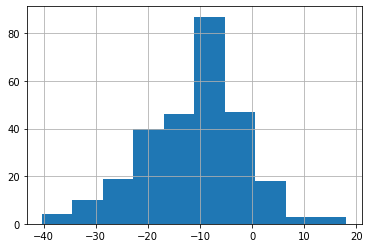

In [3]:
df["band0"].hist()

- Declare feature vector and target vector.

In [115]:
X = df.drop(columns=['animal','file'], axis=1) 
y = df['animal']

- Split data into into separate training and test sets.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0)

- Feature scaling

In [45]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,band0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24
0,-0.517501,-1.074493,-1.471011,-1.412433,-0.429146,-0.371495,-0.455460,-0.039489,-0.062794,0.087273,...,-0.197846,-0.355584,-1.551445,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507,-1.326507
1,0.186857,-1.075348,0.259667,-1.007776,-0.332961,0.299448,-0.799661,0.267140,0.276694,-0.229793,...,0.225778,0.004451,-0.228451,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907,-0.140907
2,-0.962868,-0.000314,-0.412355,-0.635843,-0.116231,-0.782815,-0.475533,-0.446369,-0.754770,-0.857159,...,-0.717349,-0.594625,-0.122796,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152,-0.074152
3,-0.093348,0.415858,-0.025828,-0.399444,-0.255923,-0.469192,-0.296499,-0.566653,-0.466237,-0.200674,...,-0.526802,-0.358423,0.527121,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003,0.518003
4,0.430474,-0.073263,-0.172135,-0.348431,0.385860,0.548866,0.620698,0.595613,0.522958,0.439626,...,0.561450,0.728608,0.249934,0.148554,0.148106,0.147822,0.147627,0.147493,0.147408,0.147366


---

## Polynomial Regression

---

Since our data values must be categorical, either dogs (0) or cats (1), training a polynomial regression model over our objective would result completely useless. We don't need continuous results, we only want categorical results, 0 or 1.**

Therefore, a better option is to train a Logistic Regression model which returns us a value of 0 or 1.

---

## Logistic Regression

---

### $\color{pink}{\text{(1) Basic notions}}$


Logistic regression is one of the most common machine learning algorithms used for binary classification. It predicts the probability of occurrence of a binary outcome (cat or dog) using a logit function (sigmoid function). 

The following picture illustrates the Decision Boundary process:

<center><img src="LR.PNG" width="450" height="300"></center>

### $\color{pink}{\text{(3) Code}}$

In [54]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

- Evaluation

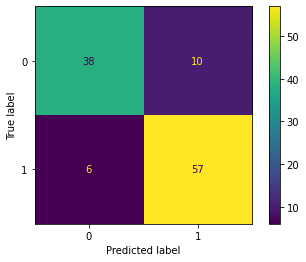

In [57]:
LogReg_pred = LogReg.predict(X_test)
cm = confusion_matrix(y_test,LogReg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= LogReg.classes_)
disp.plot()
plt.show()

In [59]:
print(classification_report(y_test, LogReg_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.85      0.90      0.88        63

    accuracy                           0.86       111
   macro avg       0.86      0.85      0.85       111
weighted avg       0.86      0.86      0.85       111



---

## Support vector machine (SVM)

---

### $\color{pink}{\text{(1) Basic notions}}$

- A support vector machine (SVM) is a supervised machine learning model that can be used for both classification or regression challenges. 

- This algorithm works by mapping data to a high-dimensional **feature space** so that data points can be categorized, even when the data are not otherwise linearly separable. Then, it performs classification by finding the hyper-plane that differentiates the two classes very well (decision boundary).

- Support vectors: data points that define the margin (empty space between classes). The decision boundary depends on this data points.

- Maximal margine: The solution maximizes the margin between the classes.

<center><img src="svm.png" width="500" height="340"></center>

### $\color{pink}{\text{(3) Code}}$

In [63]:
from sklearn import svm

svc= svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
from sklearn.model_selection import GridSearchCV 

parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]} # Checking only three possible values for the C parameter
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print("The best parameters are {} with a score of {:0.2f}".format(clf.best_params_, clf.best_score_))


The best parameters are {'C': 0.1, 'kernel': 'linear'} with a score of 0.86


- Evaluation:

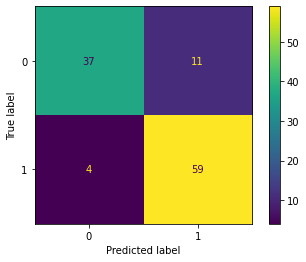

In [66]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [67]:
grid_predictions = clf.predict(X_test)

# print classification report

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        48
           1       0.84      0.94      0.89        63

    accuracy                           0.86       111
   macro avg       0.87      0.85      0.86       111
weighted avg       0.87      0.86      0.86       111



---

## k-NN (k-nearest neighbours) 

---

### $\color{pink}{\text{(1) Basic notions}}$

K-NN is a supervised machine learning model that can be used for both classification or regression challenges. This algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

K-NN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected.

### $\color{pink}{\text{(3) Code}}$

For this project, we tested K-NN algorithm with different numbers of neighbours (K) to check which of them had the best performance while applied to our data. The results were as follows:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

for n_neighbors in [1,5,10,15,20,25]:

    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)

    print("Number of Neighbors:", str(n_neighbors))
    print("The accuracy:", clf.score(X_test, y_test))

Number of Neighbors: 1
The accuracy: 0.8288288288288288
Number of Neighbors: 5
The accuracy: 0.8108108108108109
Number of Neighbors: 10
The accuracy: 0.8468468468468469
Number of Neighbors: 15
The accuracy: 0.8108108108108109
Number of Neighbors: 20
The accuracy: 0.8108108108108109
Number of Neighbors: 25
The accuracy: 0.8108108108108109


**Observation:** It is important to choose wisely the K value. For low values of K, the classifier overfits the data. As we increase the K value we achieve a correct classification. However, if K is too large we might start underfitting the data. This fact is refected on the Accuracy of each classifier. The higher accuracy was obtained using K = 10, and with lower and higher values of K the accuracy obtained was lower.

- Evaluation

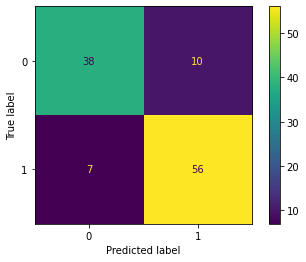

In [71]:
knn = KNeighborsClassifier(10) #We select K=10, the highest accuracy
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test,knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [72]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.85      0.89      0.87        63

    accuracy                           0.85       111
   macro avg       0.85      0.84      0.84       111
weighted avg       0.85      0.85      0.85       111



---

## Naïve Bayes Classification

---

### $\color{pink}{\text{(1) Basic notions}}$

- Bayes Theorem

Given an hypothesis H and evidence E, **Bayes Theorem** states that the relationship between the probability of the hypothesis before getting the evidence P(E) and the probability of the hypothesis after getting the evidence P(H|E) is:


$$ P(H|E) = \frac{P(E|H)P(H)}{P(E)} $$ 

$\color{purple}{\text{P(H|E)}}$ → **Posterior:** How probable is the hypothesis, given the observed evidence?

$\color{lightblue}{\text{P(E|H)}}$ → **Likelihood:** How probable is the evidence, given that the hypothesis is true?

$\color{pink}{\text{P(H)}}$ → **Prior:** How probable was the hypothesis before observing the evidence?

$\color{lightgreen}{\text{P(E)}}$ → **Marginal:** How probable is the evidence under all possible hypothesis?

- Naïve Bayes

**Naïve Bayes** algorithm is simple but powerful supervised learning algorithm, which is based on **Bayes theorem** and is used for solving classification problems. This probabilistic algorithm is considered naive because the assumptions the algorithm makes are virtually impossible to find in real-life data. It uses conditional probability to calculate a product of individual probabilities of components, so it assumes an absolute independence of features.

### $\color{pink}{\text{(2) Code}}$

- Observation

The following correlation matrix shows that the assumption of the Naive Bayes algorithm (absolute independence between features) is not true, so the features are clearly correlated in real-world problems. However, let's test the performance of this algorithm.


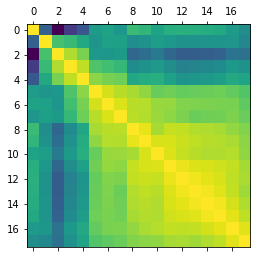

In [39]:
plt.matshow(df.corr())
plt.show()

- Gaussian Naive Bayes 

Gaussian Naive Bayes is used for numerical / continuous features. The distribution of continues values are "assumed" to be Gaussian. And therefore the likelihood probabilities are computed based on Gaussian distribution.

In [27]:
model = GaussianNB()
model.fit(X_train,y_train)

print("Accuracy obtained:", model.score(X_test, y_test))

"""
The cross_val_score() function will be used to perform the evaluation, 
taking the dataset and cross-validation configuration and returning a list 
of scores calculated for each fold.
"""

cross_val_score(model, X, y, cv=8)

Accuracy obtained: 0.7657657657657657


array([0.71428571, 0.74285714, 0.74285714, 0.8       , 0.77142857,
       0.76470588, 0.82352941, 0.73529412])

- Evaluation

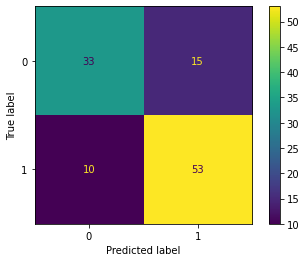

In [74]:
nb_predictions = model.predict(X_test)
cm = confusion_matrix(y_test,nb_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [76]:
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        48
           1       0.78      0.84      0.81        63

    accuracy                           0.77       111
   macro avg       0.77      0.76      0.77       111
weighted avg       0.77      0.77      0.77       111



---

## Gaussian Mixture Models (GMMs)

----

In [112]:
from sklearn.mixture import GaussianMixture
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

gmm_sklearn = GaussianMixture(n_components=2, random_state=42)

In [113]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [121]:
X = X[:, ::-1]
plot_gmm(gmm_sklearn,X)

InvalidIndexError: (slice(None, None, None), slice(None, None, -1))

---

## Results

---
- Table with the obtained Accuracy for each meathod

<center>

| Method                 | Accuracy  |
|------------------------|-----------|
| Logistic Regression    | 0.86      |
| kNN (K = 5)            | 0.85      |
| SVM (Linear, C=0.1)    | 0.86      |
| Naïve Bayes            | 0.77      |

</center>

- Conclusion